# A Python Quick Start Tutorial - Part 4

## by Peter Mackenzie-Helnwein
University of Washington, Seattle, WA

pmackenz@uw.edu          
https://www.ce.washington.edu/facultyfinder/peter-mackenzie-helnwein

## File handling

### Reading from a file

In [ ]:
f = open('simpleData.txt','r')

# YOUR CODE HERE

f.close()   # not necessary in python, but safe style

f is called the file handle.  It is a variable pointing to the system's file information.  You may have multiple files open at the same times as long es they have unique file handles (like: f1, f2, ..., inFile, outFile, ...)

Reading everything at once (good for small files)

In [ ]:
f = open('simpleData.txt','r')
data = f.read()
f.close()   # not necessary in python, but safe style

print(data)

Reading and processing one line at a time (saves memory and makes code faster with large files.  This may be the only option for HUGE files.)  To understand this approach, we need to understand that python treats a file as a **list** of lines, where each line is a string ending in newline ('\n').  Reading the file now is a simple loop through those lines:

In [4]:
f = open('simpleData.txt','r')

cnt = 0
for line in f:
    cnt += 1
    print(cnt,': ',line)

f.close()   # not necessary in python, but safe style


1 :  1, 0.0, 0.0

2 :  2, 10.0, 0.0

3 :  3, 10.0, 10.0

4 :  4, 0.0, 10.0



Note the empty line between the lines coming from the file?  This is because the lines contain one newline, and the **print** statement adds one as well.  There are two solutions to this:
1. prevent **print** from adding the newline

In [ ]:
f = open('simpleData.txt','r')

cnt = 0
for line in f:
    cnt += 1
    print(cnt,': ',line, end='')   # the end option defaults to '\n' and we tell print to add ''

f.close()

2. strip the newline (and trailing white space) from line

In [ ]:
f = open('simpleData.txt','r')

cnt = 0
for line in f:
    cnt += 1
    print(cnt,': ',line.rstrip())   # we remove the '\n' from line and let print do its default

f.close()

**Question**: What would happen if we apply both approaches simultaneously?

### Writing to a file

In [ ]:
f = open('myDataFile.txt','w')

f.write('Peter is enjoying the Bootcamp\n')       # the first line -- don't forget the newline !
f.write('I hope you all are having fun, too!\n')  # the second line

f.close()

A quick way to see the content of your file:

In [2]:
%cat myDataFile.txt

Peter is enjoying the Bootcamp
I hope you all are having fun, too!


Or just do a read as we did above:

In [ ]:
f = open('myDataFile.txt','r')   # note the 'r' for reading!
for line in f:
    print(line,end='')
f.close()

### Exception handling

Many things can go wrong when executing your code, and according to Murphy's law, they will! 

Think about opening a file to read?  What could possibly go wrong?
* the file doesn't exist
* you misspelled the filename (some OS are case sensitive) and the OS doesn't recognize your filename
* you don't have permission to read that file (possible on unix, mac)
* another program is using that file (Windows only issue)

Your code should handle most exceptions by knowing an alternative path to run, or, in the worst case, at least terminate gracefully after saving data and displaying a friendly error message.

Python provides an elegant solution to the problem in the **try** statement.

In [ ]:
f = open('some_unknown_file.txt','r')

In [ ]:
try:
    f = open('some_unknown_file.txt','r')
except FileNotFoundError:
    print('file could not be found')
except IOError:
    print('file could not be opened for reading')
except:
    raise

The above statement works as follows:
1. python executes the statements inside the **try** block (one or more lines)
2. if that code encounters a problem, an exception is raised.  Python knows many exceptions, so we can respond to different issues in different ways!
3. the **except** clause is executed if and only if the listed exception type occured.  In this example, we are catching the IOError (Inpu/Output Error).
4. the final **except** clause is like the **else** in an **if** statement: it catches every other exception.  Since we have no other plan, we simply **raise** the exception again and force python to quit with an error message.

### Reading more complex file types

In the above examples we read a file line by line.  This provided each line as one string.  However, we often need the numbers from a line to perform some computations.  This is where the **string** methods come into play. I will only demonstrate some, but you should at least browse through the list of available methods in the official [Python Tutorial](https://docs.python.org/3/library/stdtypes.html#text-sequence-type-str).

In [7]:
f = open('simpleData.txt','r')

for line in f:
    print("in: '{}'".format(line.strip()))
    string_list = line.split(',')   # this splits the line at ',' into a list of strings
    print("split: ",string_list)
    float_list = [ float(s) for s in string_list ]   #  a compressed way of writing a loop in python
    print('floats: ',float_list,'\n')

f.close()   # not necessary in python, but safe style

in: '1, 0.0, 0.0'
split:  ['1', ' 0.0', ' 0.0\n']
floats:  [1.0, 0.0, 0.0] 

in: '2, 10.0, 0.0'
split:  ['2', ' 10.0', ' 0.0\n']
floats:  [2.0, 10.0, 0.0] 

in: '3, 10.0, 10.0'
split:  ['3', ' 10.0', ' 10.0\n']
floats:  [3.0, 10.0, 10.0] 

in: '4, 0.0, 10.0'
split:  ['4', ' 0.0', ' 10.0\n']
floats:  [4.0, 0.0, 10.0] 



Things get more complicated when reading files generated by commercial software like Excel.  Such files often contain complex control sections and/or are stored in a binary format, i.e., not human readable.  Python provides some very useful libraries that help us access data from different products.  Let us look at [pandas](https://pandas.pydata.org/)

**Note**: you may need to install **pandas** and several helper packages if the following lines trigger an error on your machine.
~~~
$ pip3 install pandas openpyxl xlrd xlwt xlsxwriter
~~~

In [8]:
import pandas as pd

In [9]:
pd.read_excel('ExcelDemo.xlsx', sheet_name='SheetEQ')

,time,ax,ay
0,0.00,0.000000e+00,0.000000
1,0.02,1.230944e-03,0.019565
2,0.04,4.816754e-03,0.038129
3,0.06,1.058814e-02,0.055505
4,0.08,1.836558e-02,0.071529
...,...,...,...
296,5.92,-3.953270e-03,0.015397
297,5.94,-2.929567e-03,0.015357
298,5.96,-1.927158e-03,0.015255
299,5.98,-9.495422e-04,0.015093


In [10]:
xlsx = pd.ExcelFile('ExcelDemo.xlsx')
df = pd.read_excel(xlsx, 'SheetWind')

In [11]:
print(df)

       time       vx1        vy1       vx2        vy2       vx3        vy3
0       0.0  2.000000  10.000000  3.000000   8.000000  1.000000  12.000000
1       0.1  2.530018   9.362233  3.575509   6.948282  1.832516  11.509018
2       0.2  2.871366   8.745577  3.810590   5.946026  2.464999  11.043243
3       0.3  3.049384   8.204839  3.759053   5.100123  2.957779  10.680751
4       0.4  3.104933   7.783719  3.507140   4.491350  3.399187  10.461622
...     ...       ...        ...       ...        ...       ...        ...
996    99.6 -1.868865  11.587945 -2.382852  10.385074  3.399187 -10.461622
997    99.7 -0.698243  11.440906 -0.704805  10.264576  2.957779 -10.680751
998    99.8  0.364702  11.096718  0.812489   9.770570  2.464999 -11.043243
999    99.9  1.274208  10.598301  2.069776   8.980709  1.832516 -11.509018
1000  100.0  2.000000  10.000000  3.000000   8.000000  1.000000 -12.000000

[1001 rows x 7 columns]


#### Fetching a column is easiest by its label:

In [12]:
df['time']

0         0.0
1         0.1
2         0.2
3         0.3
4         0.4
        ...  
996      99.6
997      99.7
998      99.8
999      99.9
1000    100.0
Name: time, Length: 1001, dtype: float64

#### Plotting data from the Excel file:

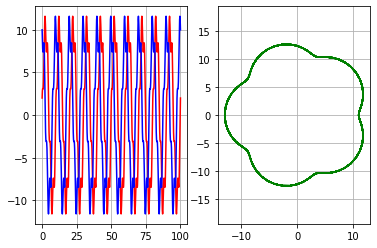

In [13]:
import matplotlib.pyplot as plt

plt.subplot(1,2,1)  # set 1x2 plots using the first axes
plt.plot(df['time'],df['vx1'],'-r')
plt.plot(df['time'],df['vy1'],'-b')
plt.grid(True)

plt.subplot(1,2,2)  # set 1x2 plots using the second axes
plt.plot(df['vx3'],df['vy3'],'-g')
plt.axis('equal')   # force both axes using the same scale
plt.grid(True)

The **pandas** package provides its own set of plotting features, emulating many of Excel's chart features.  Please browse through [Plotting using pandas](https://pandas.pydata.org/docs/user_guide/visualization.html) to see what's available and how to use it.

The **pandas** package is way more powerful than this simple demonstration.  More information can be found on the **pandas** website:

* [More on reading and writing Excel files](https://pandas.pydata.org/docs/user_guide/io.html#excel-files)
* [Indexing and selecting data](https://pandas.pydata.org/docs/user_guide/indexing.html)
* If you are doing some serious work involving more complicated Excel files, take the time and study [the full Pandas User Guide](https://pandas.pydata.org/docs/user_guide/index.html#user-guide)

### Creating data using the pandas data type
([Quick read from the manual](https://pandas.pydata.org/docs/getting_started/intro_tutorials/01_table_oriented.html#min-tut-01-tableoriented))

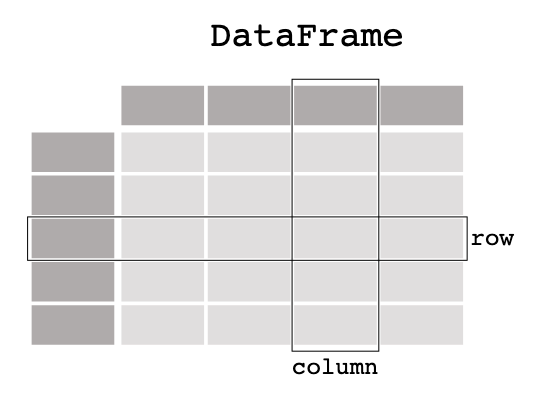
image and code example from [https://pandas.pydata.org/docs/getting_started/intro_tutorials/01_table_oriented.html#min-tut-01-tableoriented](https://pandas.pydata.org/docs/getting_started/intro_tutorials/01_table_oriented.html#min-tut-01-tableoriented)

In [ ]:
# creating a data frame object
my_df = pd.DataFrame({
        "Name": ["Braund, Mr. Owen Harris",
                 "Allen, Mr. William Henry",
                 "Bonnell, Miss. Elizabeth"],
        "Age": [22, 35, 58],
        "Sex": ["male", "male", "female"]}
    )

In [ ]:
my_df

This dataframe can be written directly to a sheet in an excel file.

**WARNING**: this operation will overdrite the existing file !!!

In [ ]:
my_df.to_excel('MyExcelFile.xlsx', sheet_name='SheetDemo')

Screen Shot 2020-07-27 at 5.46.27 AM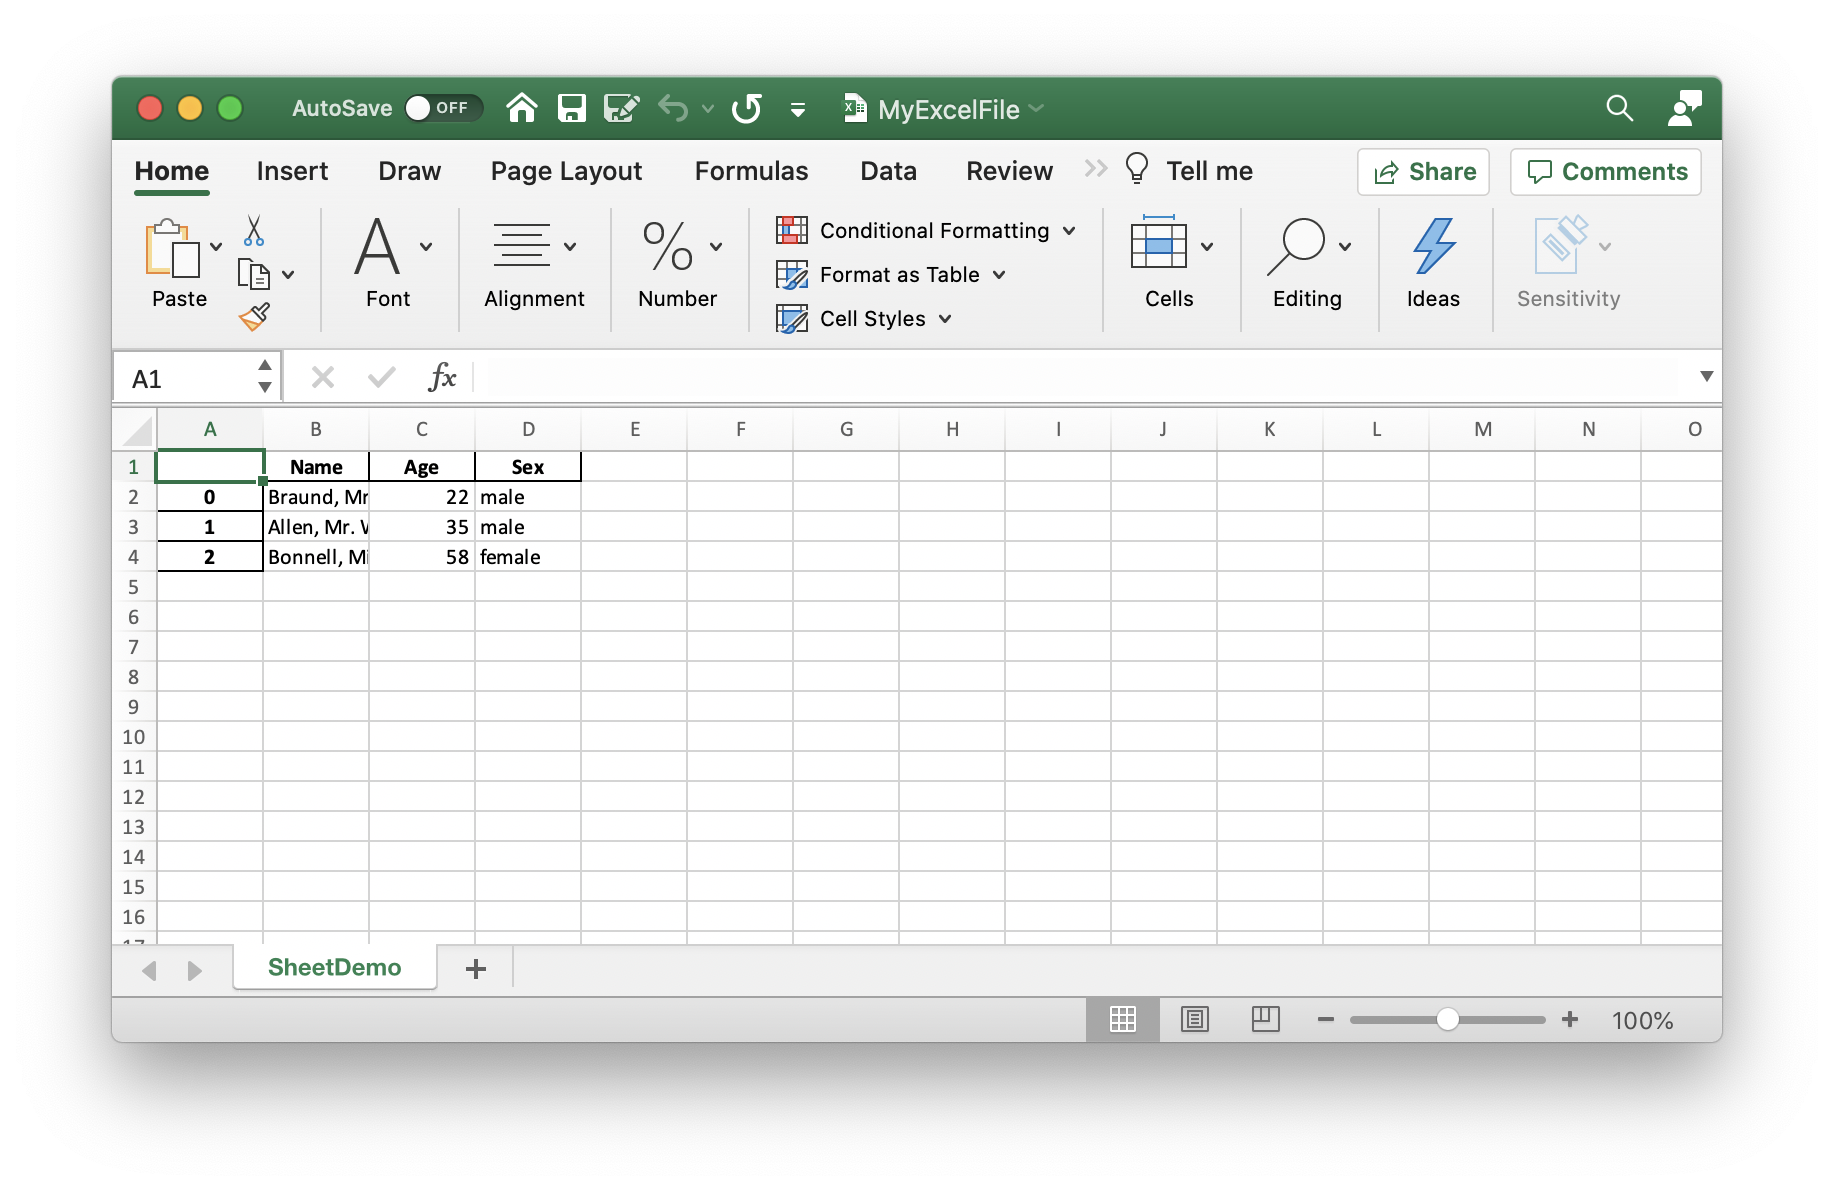

If you want to learn more on using the **pandas** library, here some more resources for you:
* [The full Pandas Tutorial](https://pandas.pydata.org/docs/): beginner's tutorial, full documentation, API
* [Complete Python Pandas Data Science Tutorial! (Reading CSV/Excel files, Sorting, Filtering, Groupby)](https://www.youtube.com/watch?v=vmEHCJofslg) (~ 1 hour video)

<hr>

[Jump to chapter 3: Plotting](./03%20Plotting%20using%20matplotlib.ipynb)

[Jump to chapter 5: Classes](./05%20Classes.ipynb)

[Back to the outline](./00%20Outline.ipynb)